# Recommendation Systems using Correlation

Steps to be followed:
- 1. Import the necessary libraries and Loading the datasets
- 2. EDA with visual Represenation
- 3. create a movie matrix using pivot table- userid, movieid and ratings as its values
- 4. Select a movie and find its user ratings using movie matrix
- 6. Find the top correlation score of that movie in the movie matrix
- 7. join the number of ratings column
- 8. For number of rating > 100 arrange the correlation score in ascending order
- 9. the top movies would give you the most similiar movies that can be recommended


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("ratings.csv")
df.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [3]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df = pd.merge(df, movies, on="movieId")

In [5]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama


In [6]:
df.shape

(105339, 6)

## EDA

lets find the highest ratings and the number of ratings of each movie title

In [7]:
df.groupby('title')["rating"].mean().sort_values(ascending= False)

title
Being Human (1993)                                   5.0
Three Ages (1923)                                    5.0
The Liberator (2013)                                 5.0
October Baby (2011)                                  5.0
Resident Evil: Retribution (2012)                    5.0
                                                    ... 
Day Night Day Night (2006)                           0.5
The Aztec Mummy Against the Humanoid Robot (1958)    0.5
Angels in America (2003)                             0.5
Blood of a Poet, The (Sang d'un poète, Le) (1930)    0.5
It's Pat (1994)                                      0.5
Name: rating, Length: 10323, dtype: float64

In [8]:
df.groupby("title")["rating"].count().sort_values(ascending = False)

title
Pulp Fiction (1994)                                325
Forrest Gump (1994)                                311
Shawshank Redemption, The (1994)                   308
Jurassic Park (1993)                               294
Silence of the Lambs, The (1991)                   290
                                                  ... 
Le Grand Restaurant (1966)                           1
League of Ordinary Gentlemen, A (2004)               1
Leap Year (Año bisiesto) (2010)                      1
Leatherface: Texas Chainsaw Massacre III (1990)      1
'71 (2014)                                           1
Name: rating, Length: 10323, dtype: int64

In [9]:
rate = pd.DataFrame(df.groupby("title")["rating"].mean())
rate.head()

,rating
title,
'71 (2014),3.500
'Hellboy': The Seeds of Creation (2004),3.000
'Round Midnight (1986),2.500
'Til There Was You (1997),4.000
"'burbs, The (1989)",3.125


In [10]:
rate["num_ratings"] = pd.DataFrame(df.groupby('title')['rating'].count())
rate.head()

,rating,num_ratings
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


In [11]:
rate.num_ratings.value_counts(dropna= False)

1      3638
2      1454
3       836
4       539
5       485
       ... 
294       1
222       1
158       1
150       1
311       1
Name: num_ratings, Length: 184, dtype: int64

<AxesSubplot:>

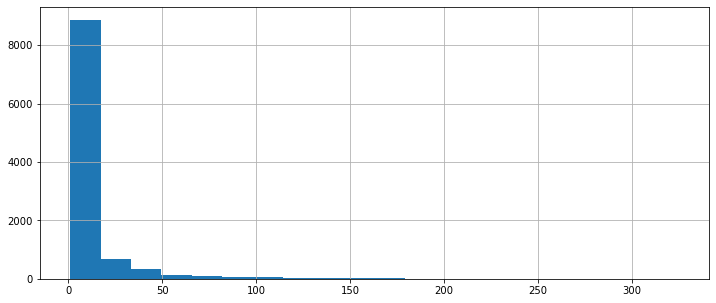

In [12]:
plt.figure(figsize=(12,5))
rate.num_ratings.hist(bins=20)

<AxesSubplot:>

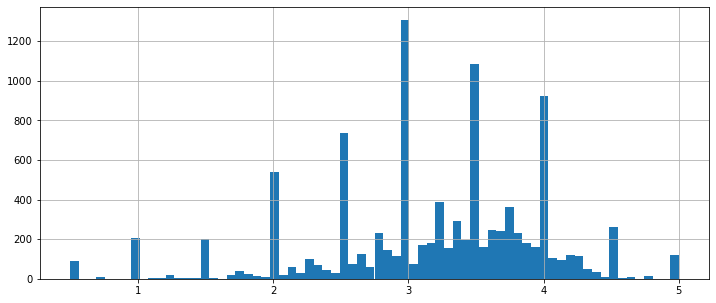

In [13]:
plt.figure(figsize=(12,5))
rate.rating.hist(bins=70)

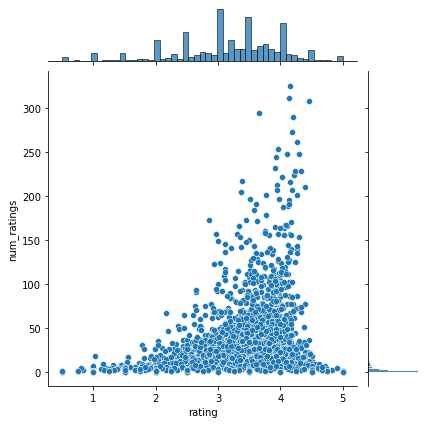

In [14]:
sns.jointplot(x='rating',y='num_ratings',data=rate)

- The denser points means more number of rating.
- ratings between 3 and 4 have more number of ratings.

## Recommending Similar Movies

In [15]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama


In [16]:
moviemat = df.pivot_table(index='userId',columns='title',values='rating').fillna(0)
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- find the movies with the highest number of ratings

In [17]:
rate.head()

,rating,num_ratings
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


In [18]:
rate.sort_values('num_ratings',ascending= False).head()

,rating,num_ratings
title,,
Pulp Fiction (1994),4.160000,325
Forrest Gump (1994),4.138264,311
"Shawshank Redemption, The (1994)",4.454545,308
Jurassic Park (1993),3.659864,294
"Silence of the Lambs, The (1991)",4.194828,290


- Pulp Fiction  movie has the highest nuber of rating s

Lets choose one movie and find recommendations based on that movie.
- That means if a user sees 'Jurassic Park', he should get the following recommendations

In [19]:
Jurassic_user_ratings = moviemat["Jurassic Park (1993)"]
Jurassic_user_ratings

userId
1      3.5
2      0.0
3      4.0
4      0.0
5      3.0
      ... 
664    2.0
665    3.5
666    0.0
667    0.0
668    4.0
Name: Jurassic Park (1993), Length: 668, dtype: float64

Use the corrwith() method and find the correlation i.e how is Jurassic Park correlated with the other movies

In [20]:
similiar_to_Jurassic = moviemat.corrwith(Jurassic_user_ratings)
similiar_to_Jurassic

title
'71 (2014)                                       0.007861
'Hellboy': The Seeds of Creation (2004)         -0.032532
'Round Midnight (1986)                           0.048254
'Til There Was You (1997)                        0.036241
'burbs, The (1989)                               0.058623
                                                   ...   
loudQUIETloud: A Film About the Pixies (2006)    0.028057
xXx (2002)                                       0.059532
xXx: State of the Union (2005)                   0.035833
¡Three Amigos! (1986)                            0.060802
À nous la liberté (Freedom for Us) (1931)        0.048254
Length: 10323, dtype: float64

Convert this correlation data into a dataframe

In [21]:
corr_jurassic = pd.DataFrame(similiar_to_Jurassic, columns=["Correlation"])
corr_jurassic.head()

,Correlation
title,
'71 (2014),0.007861
'Hellboy': The Seeds of Creation (2004),-0.032532
'Round Midnight (1986),0.048254
'Til There Was You (1997),0.036241
"'burbs, The (1989)",0.058623


In [22]:
corr_jurassic.sort_values('Correlation', ascending= False).head(10)

,Correlation
title,
Jurassic Park (1993),1.000000
Speed (1994),0.554932
Terminator 2: Judgment Day (1991),0.547722
True Lies (1994),0.526494
Forrest Gump (1994),0.517095
"Fugitive, The (1993)",0.493990
Pretty Woman (1990),0.475958
Batman (1989),0.463789
Ghost (1990),0.451132


- This correlation is only based on the rating given by the users,
- let find the movies with the higher number of reviews and then find its correlation w.r.t its ratings given.

In [23]:
corr_jurassic = corr_jurassic.join(rate["num_ratings"])
corr_jurassic.head()

,Correlation,num_ratings
title,,
'71 (2014),0.007861,1
'Hellboy': The Seeds of Creation (2004),-0.032532,1
'Round Midnight (1986),0.048254,1
'Til There Was You (1997),0.036241,3
"'burbs, The (1989)",0.058623,20


In [24]:
corr_jurassic[corr_jurassic['num_ratings']>100].sort_values('Correlation',ascending= False).head(10)

,Correlation,num_ratings
title,,
Jurassic Park (1993),1.000000,294
Speed (1994),0.554932,197
Terminator 2: Judgment Day (1991),0.547722,253
True Lies (1994),0.526494,184
Forrest Gump (1994),0.517095,311
"Fugitive, The (1993)",0.493990,244
Pretty Woman (1990),0.475958,148
Batman (1989),0.463789,217
Ghost (1990),0.451132,142


- Leaving the first movie (which is itself) these are the top 10 movies that can be recommended to a user who has watched 'Jurassic Park (1993)' movie

## Create a function with all the above code put together to get the final output

In [25]:
def recommend_top_10(movie):
    #movie user rating
    movie_rating = moviemat["Mask, The (1994)"]
    
    #get similiar ratings 
    similiar_to_movie = moviemat.corrwith(movie_rating)
    
    #convert into dataframe
    corr_to_movie = pd.DataFrame(similiar_to_movie, columns=["Correlation"])
    corr_to_movie.dropna(inplace= True)
    
    #Join the number of ratings column
    corr_to_movie = corr_to_movie.join(rate["num_ratings"])
    
    #For number of rating > 100 arrange the correlation in ascending order
    top_10_correlated_movies = corr_to_movie[corr_to_movie["num_ratings"]>100].sort_values("Correlation", ascending= False)
    
    return top_10_correlated_movies[1:11]

In [26]:
recommend_top_10('Mask, The (1994)')

,Correlation,num_ratings
title,,
Ace Ventura: Pet Detective (1994),0.537210,173
Speed (1994),0.498757,197
Mrs. Doubtfire (1993),0.494778,166
Interview with the Vampire: The Vampire Chronicles (1994),0.491730,122
Batman Forever (1995),0.487402,157
Batman (1989),0.482243,217
Dumb & Dumber (Dumb and Dumber) (1994),0.475340,149
True Lies (1994),0.466057,184
Home Alone (1990),0.466031,124


We can get top recommenations of any movie by just using the above function.